In [1]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#%config InlineBackend.figure_formats = ['pdf']

In [2]:
filename = 'tmp.json'
with open(filename) as json_file:
    data = json.load(json_file)
testRuns = pd.io.json.json_normalize(data)
#testRuns = testRuns.loc[testRuns['tripGenRate'] < 0.06]
#testRuns = testRuns.loc[testRuns['tripGenRate'] > 0.00]

In [3]:
testRuns.columns

Index(['step', 'timeMins', 'numTravelers', 'averageTrips', 'averageSteps',
       'averageStepsPerTrip', 'averageDist', 'averageDistPerTrip',
       'tripsCompleted', 'passengerSteps', 'stepsMoving', 'stepsWaiting',
       'distanceTraveled', 'reservationsCanceled', 'reservationsCompleted',
       'scheduleInvalid', 'stepsWithPassenger', 'stepsWithoutPassenger',
       'stepsTravelingWithPassenger', 'stepsTravelingWithoutPassenger',
       'distWithPassenger', 'distWithoutPassenger', 'lastTripStep',
       'reservationPriority', 'lanePolicy', 'numVehicles', 'numRoadCells',
       'grids', 'density', 'tripGenRate', 'hovMin', 'seed'],
      dtype='object')

In [4]:
grids = 4
df = testRuns
numRoadCells = (16*grids*2*(grids*2+1)*2 + (16*grids*2*grids*2)) * 2
df['distWithPassenger'] = df['distanceTraveled'].apply(lambda o: sum(o[1:]))
df['stepsWithPassenger'] = df['stepsMoving'].apply(lambda o: sum(o[1:])) + df['stepsWaiting'].apply(lambda o: sum(o[1:]))
df['distWithoutPassenger'] = df['distanceTraveled'].apply(lambda o: o[0])
df['stepsWithoutPassenger'] = df['stepsMoving'].apply(lambda o: o[0]) + df['stepsWaiting'].apply(lambda o: o[0])
df['stepsTravelingWithoutPassenger'] = df['stepsMoving'].apply(lambda o: o[0])

In [5]:
df['averageSpeedWithPassenger'] = df['distWithPassenger'].div(df['stepsWithPassenger']) * 7.5 / 1000 * 60 * 60 
df['averageSpeedWithoutPassenger'] = df['distWithoutPassenger'].div(df['stepsWithoutPassenger'])
df['averageSpeed'] = df['distanceTraveled'].apply(lambda o: sum(o)) / (df['stepsMoving'].apply(lambda o: sum(o)) + df['stepsWaiting'].apply(lambda o: sum(o))) * 7.5 / 1000 * 60 * 60 
df['averageStepsWithoutPassenger'] = df['stepsWithoutPassenger'].div(df['numVehicles'])
df['averageStepsTravelingWithoutPassenger'] = df['stepsTravelingWithoutPassenger'].div(df['numVehicles'])
df['densityCell'] = df['numVehicles'].div(numRoadCells)
df['densityKm'] = df['numVehicles'].div(numRoadCells)/7.5*1000
densityLabelsCell = np.around(np.arange(0.1, 0.575, 0.025), 3)
densityBinsCell = np.arange(0.075, 0.575, 0.025)
densityLabelsKm = np.arange(20, 75, 5)
densityBinsKm = np.arange(15, 75, 5)
df['densityBin'] = pd.cut(df['densityKm'], densityBinsKm, labels = densityLabelsKm)
testRuns = df
#32*grids*grids/numRoadCells/7.5*1000

In [6]:
df['passengerSteps']

0         825830
1        3366174
2        6670718
3        9851725
4       13261768
          ...   
1291     2572160
1292     5083861
1293     8574325
1294     8879588
1295     8879588
Name: passengerSteps, Length: 1296, dtype: int64

In [7]:
df['averageSpeedWithPassenger']

0       19.324728
1       19.957484
2       20.166738
3       20.212954
4       20.303668
          ...    
1291    13.427533
1292    11.503643
1293    10.564932
1294     8.515427
1295     7.040046
Name: averageSpeedWithPassenger, Length: 1296, dtype: float64

In [8]:
testRunsComp = testRuns.loc[testRuns['step'] == 3600].copy()
testRunsComp = testRunsComp.loc[testRunsComp['lastTripStep'] >= 3599]
row_indexer = testRunsComp['lanePolicy'] == False
testRunsComp.loc[row_indexer, 'hovMin'] = 0
testRunsComp

,step,timeMins,numTravelers,averageTrips,averageSteps,averageStepsPerTrip,averageDist,averageDistPerTrip,tripsCompleted,passengerSteps,...,hovMin,seed,averageSpeedWithPassenger,averageSpeedWithoutPassenger,averageSpeed,averageStepsWithoutPassenger,averageStepsTravelingWithoutPassenger,densityCell,densityKm,densityBin
5,3600,60.0,9148,9143,3112115,340.38226,2440552,266.93120,50248,16373883,...,3,1615214162530,20.320996,0.612802,20.232437,84.470052,36.695747,0.346154,46.153846,50
11,3600,60.0,9038,9115,3224918,353.80340,2536196,278.24420,50358,16793544,...,0,1615214162530,21.134035,0.733382,21.102748,84.535156,40.348090,0.346154,46.153846,50
23,3600,60.0,8244,9508,3325792,349.78882,2562003,269.45760,51168,16461681,...,3,1615214162531,20.283482,0.611295,20.198026,81.441406,35.414497,0.346154,46.153846,50
29,3600,60.0,8296,9545,3441315,360.53590,2643254,276.92550,51116,16857177,...,0,1615214162531,20.973034,0.725512,20.941846,81.135851,38.361979,0.346154,46.153846,50
35,3600,60.0,5205,11339,3676004,324.19120,1794919,158.29605,54207,16025332,...,0,1615214162531,14.058903,0.715209,14.309271,171.671875,77.232205,0.346154,46.153846,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,3600,60.0,11067,6949,3814278,548.89594,1042375,150.00360,46467,16192486,...,0,1615226474560,11.468106,0.698409,11.809662,166.457899,73.573351,0.346154,46.153846,50
1265,3600,60.0,9718,10147,3553012,350.15393,2748616,270.87967,49532,16340396,...,3,1615226474561,19.953735,0.621887,19.865078,100.940972,44.454861,0.346154,46.153846,50
1271,3600,60.0,9424,10132,3529032,348.30557,2770195,273.41050,49826,16565429,...,0,1615226474561,21.018360,0.732841,20.983322,102.440972,48.736111,0.346154,46.153846,50
1277,3600,60.0,20382,4373,2004903,458.47314,762521,174.37022,38868,15869998,...,0,1615226474561,9.525707,0.704388,9.954247,162.562934,72.480035,0.346154,46.153846,50


In [9]:
#print(sum(df.distWithPassenger == df.distWithPassengerTMP))
#print(sum(df.stepsWithPassenger == df.stepsWithPassengerTMP))
#print(sum(df.distWithoutPassenger == df.distWithoutPassengerTMP))
#print(sum(df.stepsWithoutPassenger == df.stepsWithoutPassengerTMP))
#print(sum(df.stepsTravelingWithoutPassenger == df.stepsTravelingWithoutPassengerTMP))

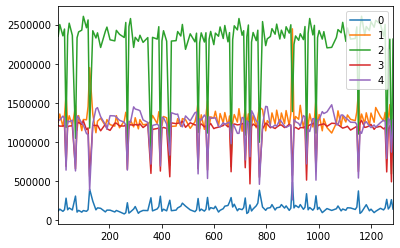

In [10]:
testRunsComp.distanceTraveled.apply(lambda o:o[0]).plot(label='0')
testRunsComp.distanceTraveled.apply(lambda o:o[1]).plot(label='1')
testRunsComp.distanceTraveled.apply(lambda o:o[2]).plot(label='2')
testRunsComp.distanceTraveled.apply(lambda o:o[3]).plot(label='3')
testRunsComp.distanceTraveled.apply(lambda o:o[4]).plot(label='4')
plt.legend()

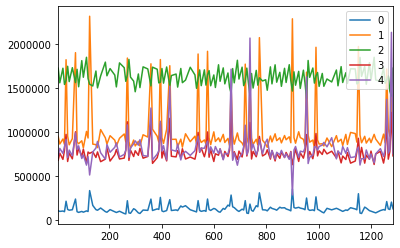

In [11]:
testRunsComp.stepsWaiting.apply(lambda o:o[0]).plot(label='0')
testRunsComp.stepsWaiting.apply(lambda o:o[1]).plot(label='1')
testRunsComp.stepsWaiting.apply(lambda o:o[2]).plot(label='2')
testRunsComp.stepsWaiting.apply(lambda o:o[3]).plot(label='3')
testRunsComp.stepsWaiting.apply(lambda o:o[4]).plot(label='4')
plt.legend()

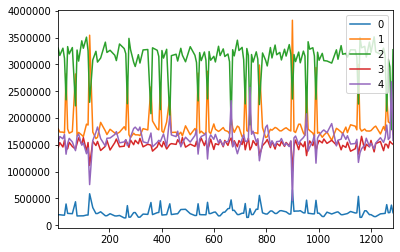

In [12]:
(testRunsComp.stepsMoving.apply(lambda o:o[0])+testRunsComp.stepsWaiting.apply(lambda o:o[0])).plot(label='0')
(testRunsComp.stepsMoving.apply(lambda o:o[1])+testRunsComp.stepsWaiting.apply(lambda o:o[1])).plot(label='1')
(testRunsComp.stepsMoving.apply(lambda o:o[2])+testRunsComp.stepsWaiting.apply(lambda o:o[2])).plot(label='2')
(testRunsComp.stepsMoving.apply(lambda o:o[3])+testRunsComp.stepsWaiting.apply(lambda o:o[3])).plot(label='3')
(testRunsComp.stepsMoving.apply(lambda o:o[4])+testRunsComp.stepsWaiting.apply(lambda o:o[4])).plot(label='4')
plt.legend()

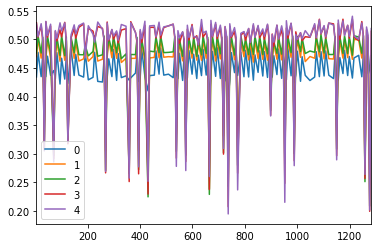

In [13]:
testRunsComp.stepsMoving.apply(lambda o:o[0]).div(testRunsComp.stepsMoving.apply(lambda o:o[0])+testRunsComp.stepsWaiting.apply(lambda o:o[0])).plot(label='0')
testRunsComp.stepsMoving.apply(lambda o:o[1]).div(testRunsComp.stepsMoving.apply(lambda o:o[1])+testRunsComp.stepsWaiting.apply(lambda o:o[1])).plot(label='1')
testRunsComp.stepsMoving.apply(lambda o:o[2]).div(testRunsComp.stepsMoving.apply(lambda o:o[2])+testRunsComp.stepsWaiting.apply(lambda o:o[2])).plot(label='2')
testRunsComp.stepsMoving.apply(lambda o:o[3]).div(testRunsComp.stepsMoving.apply(lambda o:o[3])+testRunsComp.stepsWaiting.apply(lambda o:o[3])).plot(label='3')
testRunsComp.stepsMoving.apply(lambda o:o[4]).div(testRunsComp.stepsMoving.apply(lambda o:o[4])+testRunsComp.stepsWaiting.apply(lambda o:o[4])).plot(label='4')
plt.legend()

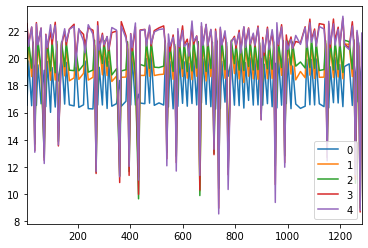

In [14]:
(testRunsComp.distanceTraveled.apply(lambda o:o[0]).div(testRunsComp.stepsMoving.apply(lambda o:o[0])+testRunsComp.stepsWaiting.apply(lambda o:o[0])) * 7.5 / 1000 * 60 * 60).plot(label='0')
(testRunsComp.distanceTraveled.apply(lambda o:o[1]).div(testRunsComp.stepsMoving.apply(lambda o:o[1])+testRunsComp.stepsWaiting.apply(lambda o:o[1])) * 7.5 / 1000 * 60 * 60).plot(label='1')
(testRunsComp.distanceTraveled.apply(lambda o:o[2]).div(testRunsComp.stepsMoving.apply(lambda o:o[2])+testRunsComp.stepsWaiting.apply(lambda o:o[2])) * 7.5 / 1000 * 60 * 60).plot(label='2')
(testRunsComp.distanceTraveled.apply(lambda o:o[3]).div(testRunsComp.stepsMoving.apply(lambda o:o[3])+testRunsComp.stepsWaiting.apply(lambda o:o[3])) * 7.5 / 1000 * 60 * 60).plot(label='3')
(testRunsComp.distanceTraveled.apply(lambda o:o[4]).div(testRunsComp.stepsMoving.apply(lambda o:o[4])+testRunsComp.stepsWaiting.apply(lambda o:o[4])) * 7.5 / 1000 * 60 * 60).plot(label='4')
plt.legend()

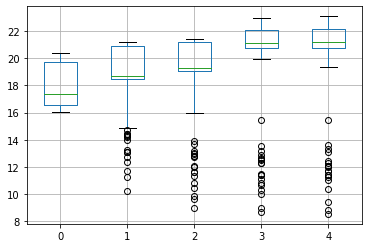

In [15]:
pd.DataFrame([testRunsComp.distanceTraveled.apply(lambda o:o[i]).div(testRunsComp.stepsMoving.apply(lambda o:o[i])+testRunsComp.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot()

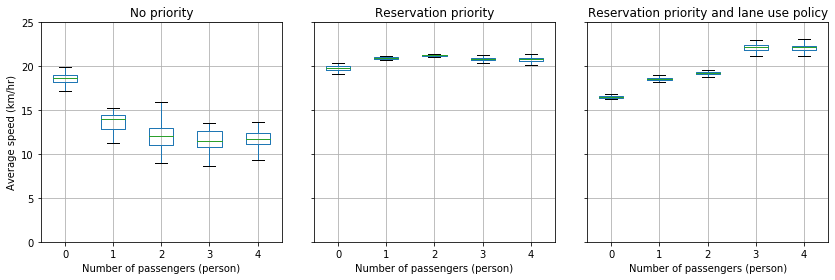

In [16]:
fig, axs = plt.subplots(1,3, sharey='row', figsize=(12,4))
#fig.suptitle('Average Speed by number of passengers')
df=testRunsComp.loc[(testRunsComp.reservationPriority == False) & (testRunsComp.lanePolicy == False)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(ax=axs[0], showfliers=False)
axs[0].set_title('No priority')
axs[0].set_xlabel('Number of passengers (person)')
axs[0].set_ylabel('Average speed (km/hr)')
plt.ylim([0,25])
df=testRunsComp.loc[(testRunsComp.reservationPriority == True) & (testRunsComp.lanePolicy == False)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(ax=axs[1], showfliers=False)
axs[1].set_title('Reservation priority')
axs[1].set_xlabel('Number of passengers (person)')
df=testRunsComp.loc[(testRunsComp.reservationPriority == True) & (testRunsComp.lanePolicy == True)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(ax=axs[2], showfliers=False)
axs[2].set_title('Reservation priority and lane use policy')
axs[2].set_xlabel('Number of passengers (person)')
plt.tight_layout()
plt.show()

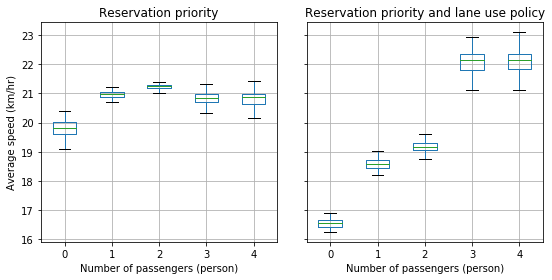

In [17]:
fig, axs = plt.subplots(1,2, sharey='row', figsize=(8,4))
#fig.suptitle('Average Speed by number of passengers')
df=testRunsComp.loc[(testRunsComp.reservationPriority == True) & (testRunsComp.lanePolicy == False)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(ax=axs[0], showfliers=False)
axs[0].set_title('Reservation priority')
axs[0].set_xlabel('Number of passengers (person)')
axs[0].set_ylabel('Average speed (km/hr)')
df=testRunsComp.loc[(testRunsComp.reservationPriority == True) & (testRunsComp.lanePolicy == True)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(ax=axs[1], showfliers=False)
axs[1].set_title('Reservation priority and lane use policy')
axs[1].set_xlabel('Number of passengers (person)')
plt.tight_layout()
plt.show()

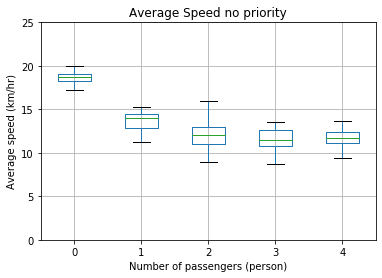

In [18]:
df=testRunsComp.loc[(testRunsComp.reservationPriority == False) & (testRunsComp.lanePolicy == False)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(showfliers=False)
plt.title('Average Speed no priority')
plt.xlabel('Number of passengers (person)')
plt.ylabel('Average speed (km/hr)')
plt.ylim([0,25])
plt.show()

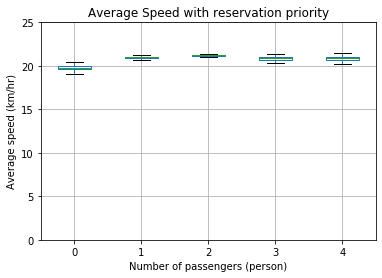

In [19]:
df=testRunsComp.loc[(testRunsComp.reservationPriority == True) & (testRunsComp.lanePolicy == False)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(showfliers=False)
plt.title('Average Speed with reservation priority')
plt.xlabel('Number of passengers (person)')
plt.ylabel('Average speed (km/hr)')
plt.ylim([0,25])
plt.show()

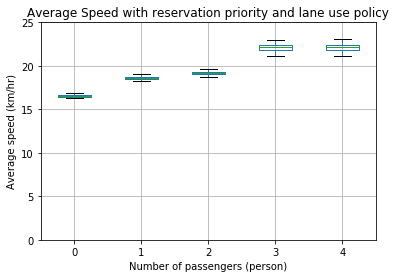

In [20]:
df=testRunsComp.loc[(testRunsComp.reservationPriority == True) & (testRunsComp.lanePolicy == True)]
pd.DataFrame([df.distanceTraveled.apply(lambda o:o[i]).div(df.stepsMoving.apply(lambda o:o[i])+df.stepsWaiting.apply(lambda o:o[i])) * 7.5 / 1000 * 60 * 60 for i in range(5)]).transpose().boxplot(showfliers=False)
plt.title('Average Speed with reservation priority and lane use policy')
plt.xlabel('Number of passengers (person)')
plt.ylabel('Average speed (km/hr)')
plt.ylim([0,25])
plt.show()

In [40]:
df=testRunsComp[['averageStepsPerTrip','reservationPriority', 'lanePolicy']]
df.loc[]

,averageStepsPerTrip,reservationPriority,lanePolicy
5,340.38226,True,True
11,353.80340,True,False
23,349.78882,True,True
29,360.53590,True,False
35,324.19120,False,False
...,...,...,...
1259,548.89594,False,False
1265,350.15393,True,True
1271,348.30557,True,False
1277,458.47314,False,False


In [22]:
#testRunsComp.loc[testRunsComp.tripsCompleted.idxmax()]

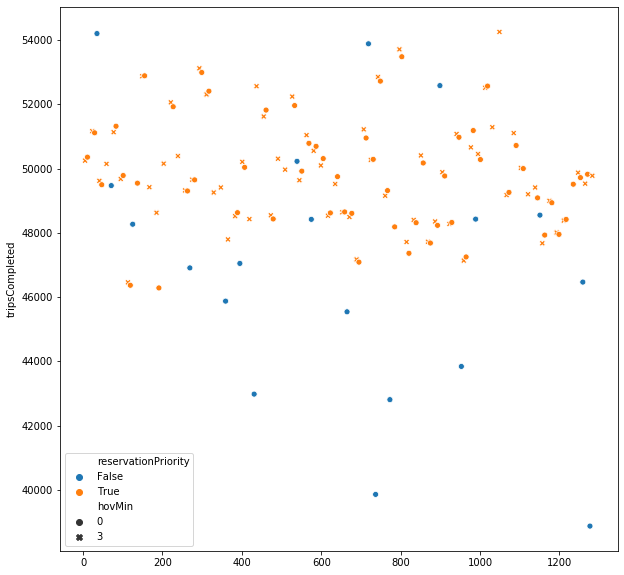

In [23]:
df = testRunsComp
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
sns.scatterplot(df.index, "tripsCompleted", data=df, hue='reservationPriority', style='hovMin', ax=ax)

In [24]:
tmp = testRunsComp.loc[testRunsComp.groupby(['seed']).tripsCompleted.idxmax().values]
tmp

,step,timeMins,numTravelers,averageTrips,averageSteps,averageStepsPerTrip,averageDist,averageDistPerTrip,tripsCompleted,passengerSteps,...,hovMin,seed,averageSpeedWithPassenger,averageSpeedWithoutPassenger,averageSpeed,averageStepsWithoutPassenger,averageStepsTravelingWithoutPassenger,densityCell,densityKm,densityBin
11,3600,60.0,9038,9115,3224918,353.80340,2536196,278.24420,50358,16793544,...,0,1615214162530,21.134035,0.733382,21.102748,84.535156,40.348090,0.346154,46.153846,50
35,3600,60.0,5205,11339,3676004,324.19120,1794919,158.29605,54207,16025332,...,0,1615214162531,14.058903,0.715209,14.309271,171.671875,77.232205,0.346154,46.153846,50
41,3600,60.0,7985,9163,2898960,316.37674,2319285,253.11415,49621,15988105,...,3,1615214162532,20.254790,0.612096,20.155925,95.493056,41.538194,0.346154,46.153846,50
59,3600,60.0,8462,9739,3497740,359.14777,2714476,278.72226,50149,16437762,...,3,1615214162533,20.230292,0.616418,20.137564,93.089410,40.701389,0.346154,46.153846,50
83,3600,60.0,9003,9773,3419115,349.85318,2689845,275.23227,51321,17143663,...,0,1615216452646,20.960469,0.732337,20.935649,75.272135,35.893663,0.346154,46.153846,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,3600,60.0,8120,8712,3157282,362.40610,2489853,285.79580,48419,16245410,...,0,1615226474558,21.146816,0.718106,21.112885,69.504340,32.495660,0.346154,46.153846,50
1235,3600,60.0,8151,9451,3486385,368.89060,2718913,287.68520,49515,16672992,...,0,1615226474559,20.976136,0.725517,20.940804,91.719184,43.307726,0.346154,46.153846,50
1247,3600,60.0,7661,8945,3103919,347.00046,2418866,270.41544,49873,16004719,...,3,1615226474560,20.287828,0.612028,20.189421,94.168403,40.931858,0.346154,46.153846,50
1271,3600,60.0,9424,10132,3529032,348.30557,2770195,273.41050,49826,16565429,...,0,1615226474561,21.018360,0.732841,20.983322,102.440972,48.736111,0.346154,46.153846,50


In [25]:
testRunsComp2 = testRunsComp[testRunsComp.seed.isin(tmp.loc[tmp.hovMin == 3].seed.values)].copy()
#testRunsComp = testRunsComp[testRunsComp.lastTripStep == 3599]
testRunsComp2

,step,timeMins,numTravelers,averageTrips,averageSteps,averageStepsPerTrip,averageDist,averageDistPerTrip,tripsCompleted,passengerSteps,...,hovMin,seed,averageSpeedWithPassenger,averageSpeedWithoutPassenger,averageSpeed,averageStepsWithoutPassenger,averageStepsTravelingWithoutPassenger,densityCell,densityKm,densityBin
41,3600,60.0,7985,9163,2898960,316.37674,2319285,253.11415,49621,15988105,...,3,1615214162532,20.254790,0.612096,20.155925,95.493056,41.538194,0.346154,46.153846,50
47,3600,60.0,8107,9079,3053036,336.27448,2385757,262.77750,49499,16491328,...,0,1615214162532,21.116903,0.722575,21.074530,94.928385,44.674045,0.346154,46.153846,50
59,3600,60.0,8462,9739,3497740,359.14777,2714476,278.72226,50149,16437762,...,3,1615214162533,20.230292,0.616418,20.137564,93.089410,40.701389,0.346154,46.153846,50
71,3600,60.0,9139,8639,3466171,401.22363,1398741,161.91006,49472,15179821,...,0,1615214162533,13.040823,0.708193,13.361022,189.631944,84.487847,0.346154,46.153846,50
167,3600,60.0,9924,9717,3311346,340.77863,2590980,266.64400,49422,16135444,...,3,1615226474500,20.065211,0.613546,19.959820,108.449219,47.457031,0.346154,46.153846,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,3600,60.0,9277,9194,3022840,328.78400,2368859,257.65270,47953,16527177,...,0,1615226474557,21.060664,0.723560,21.024518,85.378472,40.147569,0.346154,46.153846,50
1247,3600,60.0,7661,8945,3103919,347.00046,2418866,270.41544,49873,16004719,...,3,1615226474560,20.287828,0.612028,20.189421,94.168403,40.931858,0.346154,46.153846,50
1253,3600,60.0,7814,8944,3164004,353.75714,2437141,272.48892,49720,16339940,...,0,1615226474560,21.156181,0.726868,21.115570,95.535156,45.106771,0.346154,46.153846,50
1259,3600,60.0,11067,6949,3814278,548.89594,1042375,150.00360,46467,16192486,...,0,1615226474560,11.468106,0.698409,11.809662,166.457899,73.573351,0.346154,46.153846,50


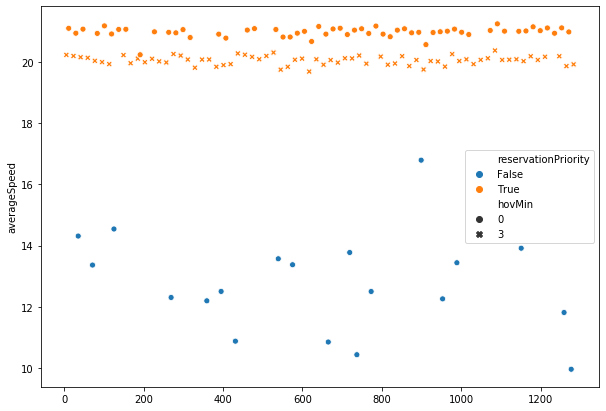

In [26]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.scatterplot(df.index, "averageSpeed", data=testRunsComp, hue='reservationPriority', style='hovMin', ax=ax)